### Overview



In [1]:
import os
import importlib
import random
import librosa
import torch
import umap
import umap.plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

import numpy as np
from TTS.utils.generic_utils import load_config
from tqdm import tqdm
from TTS.utils.speakers import save_speaker_mapping, load_speaker_mapping

# you may need to change this depending on your system
os.environ['CUDA_VISIBLE_DEVICES']='0'


colormap = np.array([
            [76, 255, 0],
            [0, 127, 70],
            [255, 0, 0],
            [255, 217, 38],
            [0, 135, 255],
            [165, 0, 165],
            [255, 167, 255],
            [0, 255, 255],
            [255, 96, 38],
            [142, 76, 0],
            [33, 0, 127],
            [0, 0, 0],
            [183, 183, 183],
                ]) / 255


In [21]:
## Teste using Prototypical-ResNetSE34L (trained on VoxCeleb) for BRspeech and VCTK

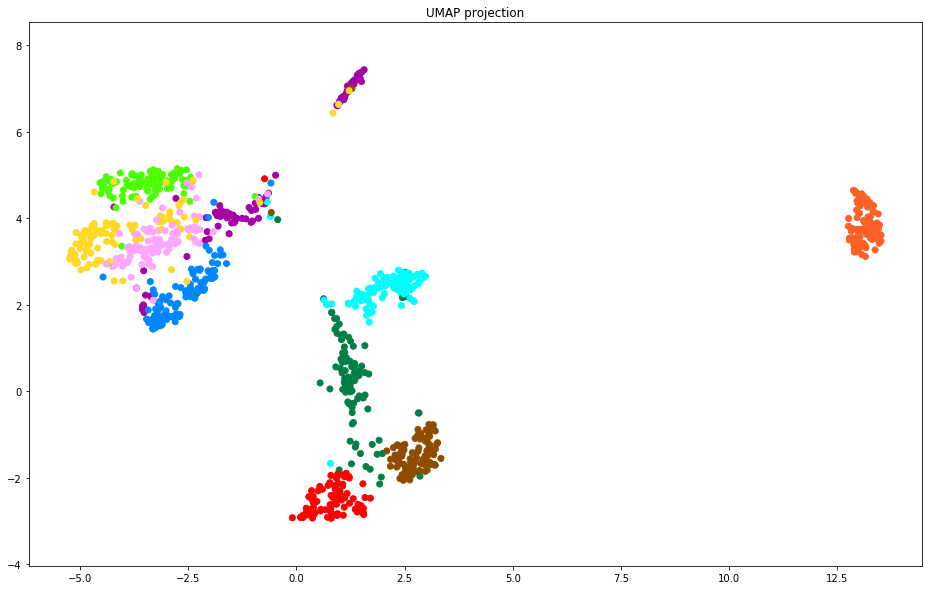

In [18]:
# Set constants
ROOT_PATH = '../../' 
SPEAKER_JSON_PATH = os.path.join(ROOT_PATH, 'speakers-pt-BRSpeech-beta3-Angular Prototypical-ResNetSE34L.json')

#test load speaker json
speaker_mapping = load_speaker_mapping(SPEAKER_JSON_PATH)
if speaker_mapping == {}:
    raise ValueError("File Not Found Error, Verify SPEAKER_JSON_PATH")
    
#config plot
max_speakers = 10
samples_per_speaker = 100

speakers_samples_color = {}
embeds = []
labels = []
colors_id = []
color_id = 0
keys_mapping = list(speaker_mapping.keys())
random.shuffle(keys_mapping)
for i, sample in enumerate(keys_mapping):
    if speaker_mapping[sample]['name'] in speakers_samples_color.keys():
        speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] = speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] + 1
    else:
        if color_id >= max_speakers: #max speakers
            continue
        speakers_samples_color[speaker_mapping[sample]['name']] = {'n_samples':1,'color':color_id}
        color_id += 1
        

    if speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] > samples_per_speaker:
        continue
    embeds.append(speaker_mapping[sample]['embedding'])
    labels.append(speaker_mapping[sample]['name'])
    colors_id.append(speakers_samples_color[speaker_mapping[sample]['name']]['color'])

    
model = umap.UMAP(random_state=42)
embedding = model.fit_transform(embeds)


num_speakers = len(speakers_samples_color.keys())
colors = []

all_colors = [k for k,v in pltc.cnames.items()]

color_speaker = list(random.sample(all_colors, num_speakers))
for id_c in colors_id:
    if id_c < len(colormap):
        colors.append(colormap[id_c])
    else:
        colors.append(color_speaker[id_c])
    
fig, ax = plt.subplots(figsize=(16, 10))
_ = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=1.0)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection")
plt.savefig("umap")
   

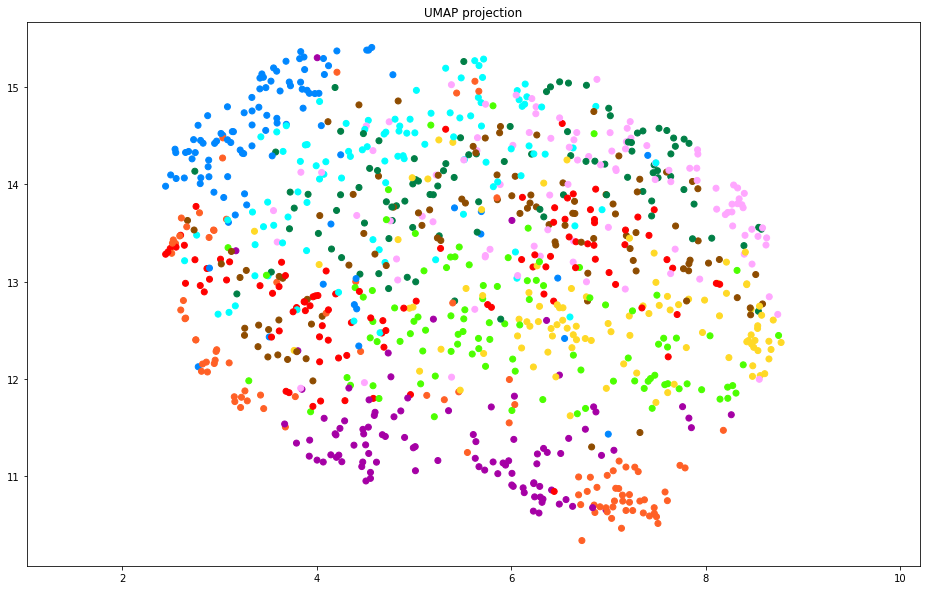

In [20]:
# Set constants
ROOT_PATH = '../../'
SPEAKER_JSON_PATH = os.path.join(ROOT_PATH, 'speakers-en-vctk-Angular Prototypical-ResNetSE34L.json')

#test load speaker json
speaker_mapping = load_speaker_mapping(SPEAKER_JSON_PATH)
if speaker_mapping == {}:
    raise "File Not Found Error, Verify SPEAKER_JSON_PATH"
    
#config plot
max_speakers = 10
samples_per_speaker = 100

speakers_samples_color = {}
embeds = []
labels = []
colors_id = []
color_id = 0
keys_mapping = list(speaker_mapping.keys())
random.shuffle(keys_mapping)
for i, sample in enumerate(keys_mapping):
    if speaker_mapping[sample]['name'] in speakers_samples_color.keys():
        speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] = speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] + 1
    else:
        if color_id >= max_speakers: #max speakers
            continue
        speakers_samples_color[speaker_mapping[sample]['name']] = {'n_samples':1,'color':color_id}
        color_id += 1
        

    if speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] > samples_per_speaker:
        continue
    embeds.append(speaker_mapping[sample]['embedding'])
    labels.append(speaker_mapping[sample]['name'])
    colors_id.append(speakers_samples_color[speaker_mapping[sample]['name']]['color'])

    
model = umap.UMAP(random_state=42)
embedding = model.fit_transform(embeds)


num_speakers = len(speakers_samples_color.keys())
colors = []

all_colors = [k for k,v in pltc.cnames.items()]

color_speaker = list(random.sample(all_colors, num_speakers))
for id_c in colors_id:
    if id_c < len(colormap):
        colors.append(colormap[id_c])
    else:
        colors.append(color_speaker[id_c])
    
fig, ax = plt.subplots(figsize=(16, 10))
_ = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=1.0)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection")
plt.savefig("umap")
   

In [ ]:
## Teste using Speech2Phone (official implementation) for BRspeech and VCTK

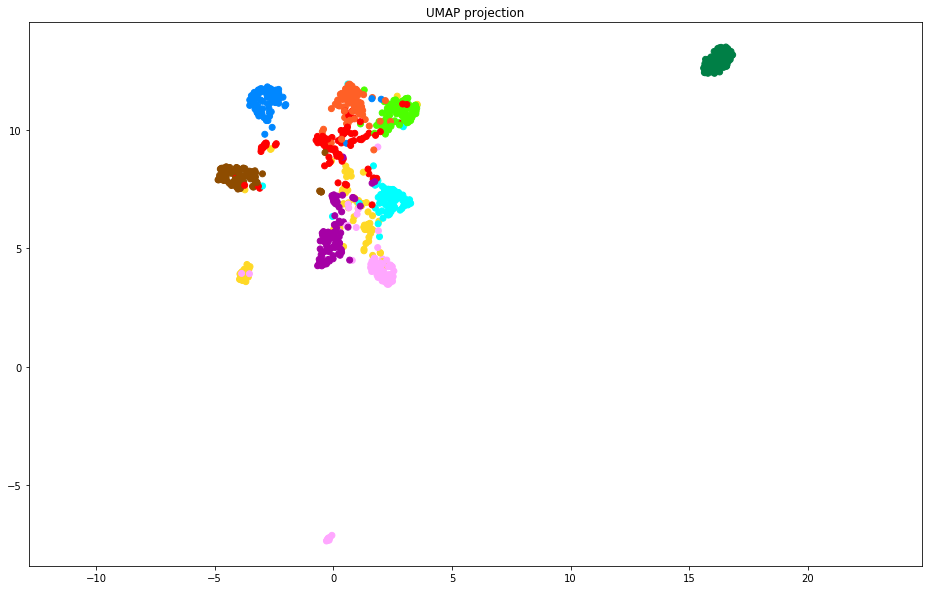

In [22]:

# Set constants
ROOT_PATH = '../../'
SPEAKER_JSON_PATH = os.path.join(ROOT_PATH, 'speakers-pt-Speech2Phone-BRSpeech-beta3.json')

#test load speaker json
speaker_mapping = load_speaker_mapping(SPEAKER_JSON_PATH)
if speaker_mapping == {}:
    raise "File Not Found Error, Verify SPEAKER_JSON_PATH"
    
    
# config plot
max_speakers = 10
samples_per_speaker = 100


speakers_samples_color = {}
embeds = []
labels = []
colors_id = []
color_id = 0
keys_mapping = list(speaker_mapping.keys())
random.shuffle(keys_mapping)
for i, sample in enumerate(keys_mapping):
    if speaker_mapping[sample]['name'] in speakers_samples_color.keys():
        speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] = speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] + 1
    else:
        if color_id >= max_speakers: #max speakers
            continue
        speakers_samples_color[speaker_mapping[sample]['name']] = {'n_samples':1,'color':color_id}
        color_id += 1
        

    if speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] > samples_per_speaker:
        continue
    embeds.append(speaker_mapping[sample]['embedding'])
    labels.append(speaker_mapping[sample]['name'])
    colors_id.append(speakers_samples_color[speaker_mapping[sample]['name']]['color'])

    

model = umap.UMAP(random_state=42)
embedding = model.fit_transform(embeds)


num_speakers = len(speakers_samples_color.keys())
colors = []

all_colors = [k for k,v in pltc.cnames.items()]

color_speaker = list(random.sample(all_colors, num_speakers))
for id_c in colors_id:
    if id_c < len(colormap):
        colors.append(colormap[id_c])
    else:
        colors.append(color_speaker[id_c])
    
fig, ax = plt.subplots(figsize=(16, 10))
_ = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=1.0)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection")
plt.savefig("umap")


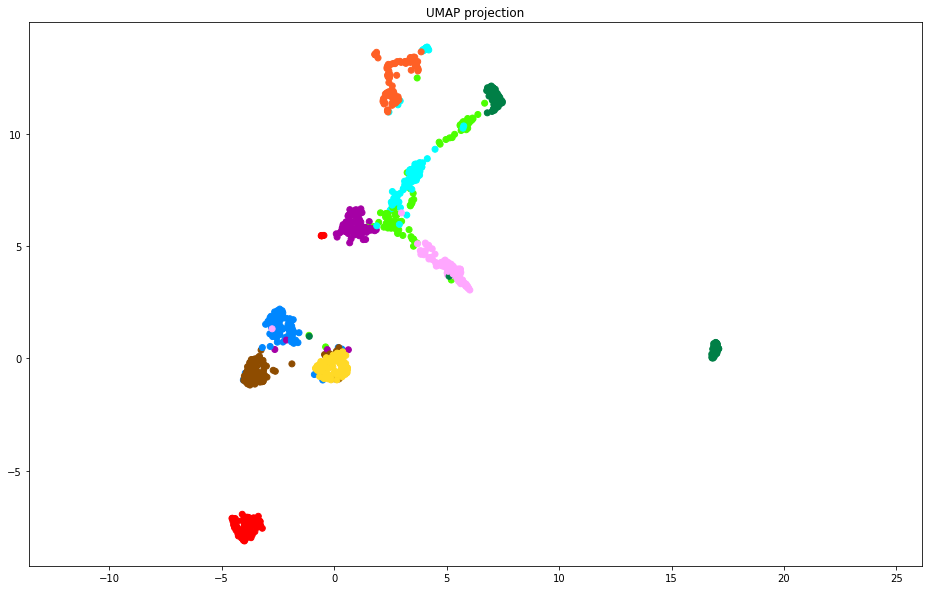

In [23]:

# Set constants
ROOT_PATH = '../../'
SPEAKER_JSON_PATH = os.path.join(ROOT_PATH, 'speakers-Speech2Phone-vctk.json')

#test load speaker json
speaker_mapping = load_speaker_mapping(SPEAKER_JSON_PATH)
if speaker_mapping == {}:
    raise "File Not Found Error, Verify SPEAKER_JSON_PATH"
    
    
# config plot
max_speakers = 10
samples_per_speaker = 100


speakers_samples_color = {}
embeds = []
labels = []
colors_id = []
color_id = 0
keys_mapping = list(speaker_mapping.keys())
random.shuffle(keys_mapping)
for i, sample in enumerate(keys_mapping):
    if speaker_mapping[sample]['name'] in speakers_samples_color.keys():
        speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] = speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] + 1
    else:
        if color_id >= max_speakers: #max speakers
            continue
        speakers_samples_color[speaker_mapping[sample]['name']] = {'n_samples':1,'color':color_id}
        color_id += 1
        

    if speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] > samples_per_speaker:
        continue
    embeds.append(speaker_mapping[sample]['embedding'])
    labels.append(speaker_mapping[sample]['name'])
    colors_id.append(speakers_samples_color[speaker_mapping[sample]['name']]['color'])

    

model = umap.UMAP(random_state=42)
embedding = model.fit_transform(embeds)


num_speakers = len(speakers_samples_color.keys())
colors = []

all_colors = [k for k,v in pltc.cnames.items()]

color_speaker = list(random.sample(all_colors, num_speakers))
for id_c in colors_id:
    if id_c < len(colormap):
        colors.append(colormap[id_c])
    else:
        colors.append(color_speaker[id_c])
    
fig, ax = plt.subplots(figsize=(16, 10))
_ = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=1.0)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection")
plt.savefig("umap")


In [ ]:
## Teste using GE2E mozilla implementation (trained on LibriTTS) for BRspeech and VCTK

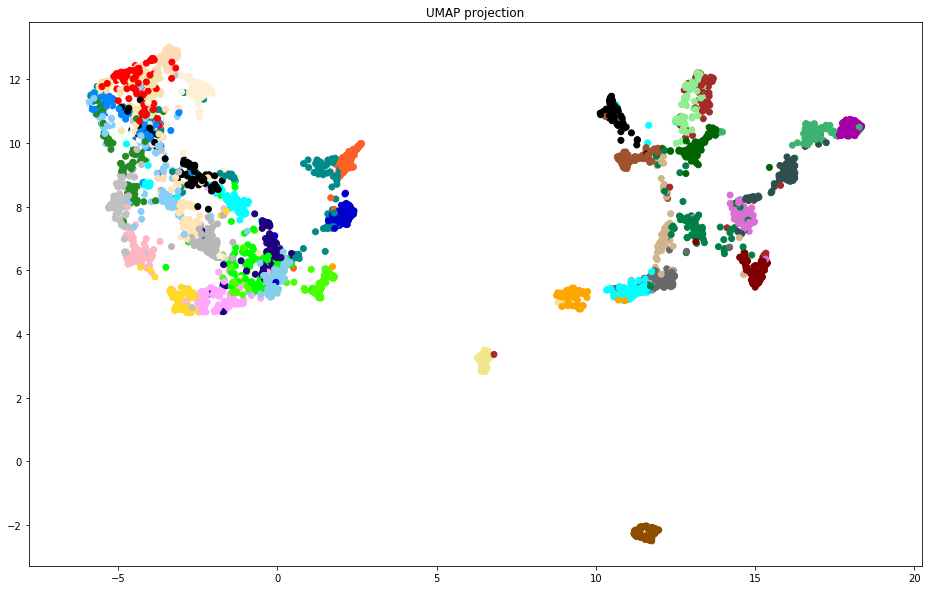

In [19]:

# Set constants
ROOT_PATH = '../../'
SPEAKER_JSON_PATH = os.path.join(ROOT_PATH, 'speakers-vctk-en.json')

#test load speaker json
speaker_mapping = load_speaker_mapping(SPEAKER_JSON_PATH)
if speaker_mapping == {}:
    raise "File Not Found Error, Verify SPEAKER_JSON_PATH"
    
    
# config plot
max_speakers = 10
samples_per_speaker = 100


speakers_samples_color = {}
embeds = []
labels = []
colors_id = []
color_id = 0
keys_mapping = list(speaker_mapping.keys())
random.shuffle(keys_mapping)
for i, sample in enumerate(keys_mapping):
    if speaker_mapping[sample]['name'] in speakers_samples_color.keys():
        speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] = speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] + 1
    else:
        if color_id >= max_speakers: #max speakers
            continue
        speakers_samples_color[speaker_mapping[sample]['name']] = {'n_samples':1,'color':color_id}
        color_id += 1
        

    if speakers_samples_color[speaker_mapping[sample]['name']]['n_samples'] > samples_per_speaker:
        continue
    embeds.append(speaker_mapping[sample]['embedding'])
    labels.append(speaker_mapping[sample]['name'])
    colors_id.append(speakers_samples_color[speaker_mapping[sample]['name']]['color'])

    

model = umap.UMAP(random_state=42)
embedding = model.fit_transform(embeds)


num_speakers = len(speakers_samples_color.keys())
colors = []

all_colors = [k for k,v in pltc.cnames.items()]

color_speaker = list(random.sample(all_colors, num_speakers))
for id_c in colors_id:
    if id_c < len(colormap):
        colors.append(colormap[id_c])
    else:
        colors.append(color_speaker[id_c])
    
fig, ax = plt.subplots(figsize=(16, 10))
_ = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, alpha=1.0)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection")
plt.savefig("umap")
